In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
import os
import matplotlib.pyplot as plt 
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
x_train[0].shape

(32, 32, 3)

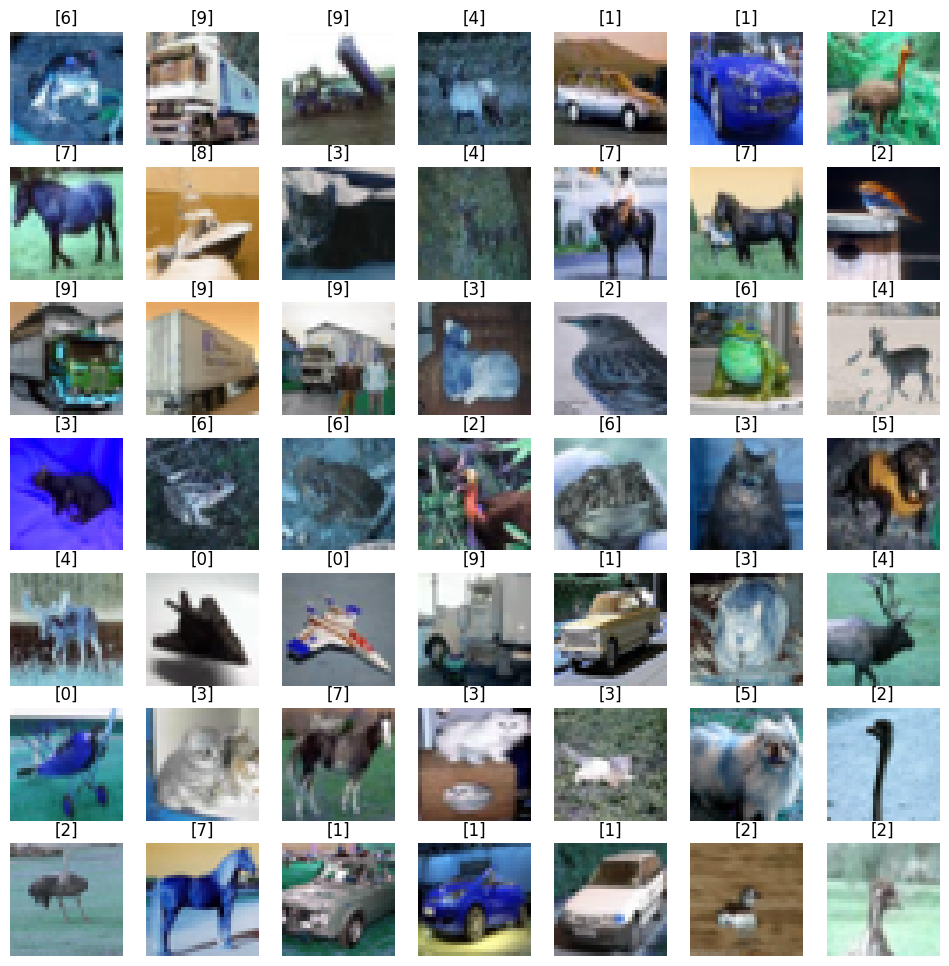

In [4]:
#plotting 5x5 images from xtrain with y_train:

grid = 7 

fig, ax = plt.subplots(grid,grid,figsize=(12,12))

for i in range(grid*grid):
    imaj = x_train[i]
    imaj = cv2.cvtColor(imaj,cv2.COLOR_BGR2RGB)
    ax[i//grid][i%grid].imshow(imaj)
    ax[i//grid][i%grid].set_title(y_train[i],fontsize = 12)
    ax[i//grid][i%grid].axis('off')

# If no data augmentation

In [5]:
print('input data:',x_train.shape)
print('val data: ',x_test.shape)

input data: (50000, 32, 32, 3)
val data:  (10000, 32, 32, 3)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [7]:
#normalizing the input is necessary

x_train_norm = x_train/255
x_test_norm = x_test/255

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
# if using categorical cross entropy, then i need to make the output one hot encoding
from tensorflow.keras.utils import to_categorical

print('first element of y_train',y_train[0])

y_train_norm = to_categorical(y_train,num_classes= 10)

print('first element of norm_y_train', y_train_norm[0])

y_test_norm = to_categorical(y_test,num_classes = 10)

first element of y_train [6]
first element of norm_y_train [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


##  Input&Output Set Summary:

* X needs to be normalized by 255
* y needs to be categorical by one-hot encoding



In [11]:
x_train[0].shape

(32, 32, 3)

# Model Building

### Info about padding in model adding

* **When to Use Padding:**
Image Classification: Use padding='same' to maintain dimensions and extract hierarchical features across the entire image.
Object Detection or Segmentation: padding='same' helps preserve spatial resolution, which is important for locating objects in an image.
Deep Networks: To avoid shrinking dimensions too quickly, especially in deep CNNs.
* **When Not to Use Padding:**
Feature Reduction: If reducing spatial dimensions early in the network is desirable, use padding='valid'.
Simple Datasets: For simpler tasks (e.g., MNIST), where preserving full spatial resolution isn't as critical.

In [12]:
x_train_norm.shape[1:]

(32, 32, 3)

### Keynotes:

- For more complex datasets (e.g., CIFAR-10 or ImageNet), a single layer may not be sufficient to capture all low-level features. Adding multiple layers with 32 filters helps the model learn a richer set of low-level patterns.


- (WO Padding in mid and high layers) Mid and high-level layers learn abstract and high-level patterns (e.g., object parts, shapes). These don’t require precise spatial details, so shrinking the feature maps without padding is fine.


In [13]:
# I prefer to have frontier layers more so it captures/extract quick information from the pic such as edge, corner, shape etc. 
from tensorflow.keras.layers import ReLU

model = Sequential()

#convolution layer:
model.add(Input(shape = (x_train_norm.shape[1:]))) #32x32x3                  #input layer 

model.add(Conv2D(32,(3,3),activation = 'relu', padding = 'same',kernel_initializer='he_uniform'))      #Layer1 (early layer) 
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation = 'relu', padding='same',kernel_initializer='he_uniform'))        #Layer2 (early layer) 
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation = 'relu', padding='same',kernel_initializer='he_uniform'))        #Layer3 (early layer) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation = 'relu', padding = 'same',kernel_initializer='he_uniform'))      #Layer1 (early layer) 
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation = 'relu', padding='same',kernel_initializer='he_uniform'))        #Layer2 (early layer) 
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation = 'relu', padding='same',kernel_initializer='he_uniform'))        #Layer3 (early layer) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer4 (mid layer) 
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer5 (mid layer)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))                            
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer6 (high layer)
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer7 (high layer)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))


model.add(Flatten())

#fully connecteed layer:
model.add(Dense(128))                                                  #Layer1(FC)
model.add(BatchNormalization())
model.add(ReLU()) 
model.add(Dropout(0.5))

model.add(Dense(64))                                                  #Layer2(FC)
model.add(BatchNormalization())
model.add(ReLU()) 
model.add(Dropout(0.5))

model.add(Dense(10,activation = 'softmax'))                            #Layer3(FC)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,363,530 (5.20 MB)

 Trainable params: 1,361,034 (5.19 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [14]:
#compiling
from tensorflow.keras.callbacks import EarlyStopping

callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
    mode="min",
    restore_best_weights=True,
)

cross_entropy = keras.losses.CategoricalCrossentropy()
adam = keras.optimizers.Adam(learning_rate = 0.00015)

model.compile(loss=cross_entropy,optimizer=adam, metrics=['accuracy'])

history = model.fit(x_train_norm,y_train_norm,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (x_test_norm,y_test_norm),
                    callbacks = [callback]
                   )

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.1577 - loss: 2.5197 - val_accuracy: 0.3042 - val_loss: 1.8337
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3041 - loss: 1.8775 - val_accuracy: 0.4282 - val_loss: 1.5682
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3950 - loss: 1.6324 - val_accuracy: 0.4681 - val_loss: 1.5006
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4701 - loss: 1.4684 - val_accuracy: 0.5669 - val_loss: 1.2017
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5358 - loss: 1.3273 - val_accuracy: 0.6110 - val_loss: 1.1034
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5792 - loss: 1.2245 - val_accuracy: 0.6596 - val_loss: 0.9460
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6237 - loss: 1.1282 - val_accuracy: 0.6815 - val_loss: 0.8916
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6500 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.4540
Test Accuracy: 0.8486999869346619


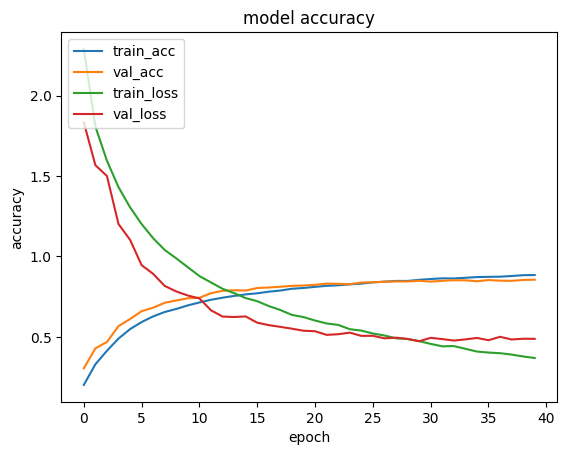

In [15]:
ev = model.evaluate(x_test_norm,y_test_norm)
print('Test Accuracy: {}'.format(ev[1]))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper left')

# If data augmentation

In [7]:
# I prefer to have frontier layers more so it captures/extract quick information from the pic such as edge, corner, shape etc. 
from tensorflow.keras.layers import ReLU

model = Sequential()

#convolution layer:
model.add(Input(shape = (x_train.shape[1:]))) #32x32x3                  #input layer 

model.add(Conv2D(32,(3,3),activation = 'relu', padding = 'same',kernel_initializer='he_uniform'))      #Layer1 (early layer) 
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation = 'relu', padding='same',kernel_initializer='he_uniform'))        #Layer2 (early layer) 
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation = 'relu', padding='same',kernel_initializer='he_uniform'))        #Layer3 (early layer) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation = 'relu', padding = 'same',kernel_initializer='he_uniform'))      #Layer1 (early layer) 
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation = 'relu', padding='same',kernel_initializer='he_uniform'))        #Layer2 (early layer) 
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation = 'relu', padding='same',kernel_initializer='he_uniform'))        #Layer3 (early layer) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer4 (mid layer) 
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer5 (mid layer)
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer5 (mid layer)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))                            
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer6 (high layer)
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer7 (high layer)
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation = 'relu',padding='same',kernel_initializer='he_uniform'))                       #Layer7 (high layer)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

#fully connecteed layer:
model.add(Dense(128))                                                  #Layer1(FC)
model.add(BatchNormalization())
model.add(ReLU()) 
model.add(Dropout(0.5))

model.add(Dense(10,activation = 'softmax'))                            #Layer3(FC)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,094,858 (7.99 MB)

 Trainable params: 2,091,722 (7.98 MB)

 Non-trainable params: 3,136 (12.25 KB)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math

train_datagen  = ImageDataGenerator(
    rotation_range=20,         # Random rotation in degrees
    width_shift_range=0.2,     # Random horizontal shift
    height_shift_range=0.2,    # Random vertical shift
    shear_range=0.15,          # Shear angle in counter-clockwise direction
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest',        # Fill pixels outside boundaries  
    rescale = 1./255           # Normalize pixel values to [0, 1]
)

#no augmentation
val_datagen = ImageDataGenerator(
    rescale = 1./225
) # Here, it ensure not using normalization seperately. it makes it normalized.


cross_entropy = keras.losses.CategoricalCrossentropy()
adam = keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(loss=cross_entropy,optimizer=adam, metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(
                                            monitor="val_loss",
                                            #min_delta=0,
                                            patience=10,
                                            verbose=1,
                                            mode="min",
                                            #baseline=None,
                                            restore_best_weights=True,
                                            #start_from_epoch=0
                                            )

train_genetor = train_datagen.flow(x_train,y_train_norm,batch_size = 32, shuffle = True)
val_generator = val_datagen.flow(x_test, y_test_norm, batch_size=32, shuffle=False)


aug_history = model.fit(train_genetor,
                        validation_data = val_generator,
                        epochs =  100, verbose = 1, callbacks = [callback])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 29ms/step - accuracy: 0.1835 - loss: 2.4828 - val_accuracy: 0.3940 - val_loss: 1.6475
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3113 - loss: 1.9046 - val_accuracy: 0.4379 - val_loss: 1.5471
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3833 - loss: 1.7117 - val_accuracy: 0.4628 - val_loss: 1.4803
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.4335 - loss: 1.5714 - val_accuracy: 0.5001 - val_loss: 1.4419
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.4694 - loss: 1.4757 - val_accuracy: 0.5286 - val_loss: 1.3188
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5146 - loss: 1.3793 - val_accuracy: 0.5676 - val_loss: 1.2260
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.5365 - loss: 1.3149 - val_accuracy: 0.5934 - val_loss: 1.1377
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5593 - los

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8816 - loss: 0.3591
Test Loss: 0.3687894940376282
Test Accuracy: 0.8794999718666077


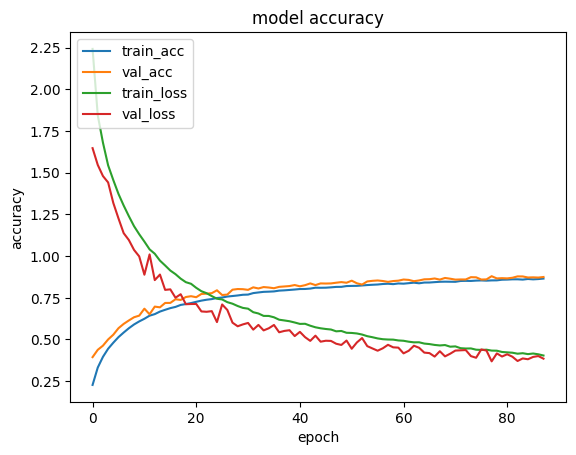

In [9]:
#no augmentation
test_datagen = ImageDataGenerator(
    rescale = 1./225
) # Here, it ensure not using normalization seperately. it makes it normalized.

test_gen = test_datagen.flow(x_test,y_test_norm,shuffle = False)

eval = model.evaluate(test_gen,verbose = 1)
# Print results
print(f"Test Loss: {eval[0]}")
print(f"Test Accuracy: {eval[1]}")


plt.plot(aug_history.history['accuracy'])
plt.plot(aug_history.history['val_accuracy'])
plt.plot(aug_history.history['loss'])
plt.plot(aug_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper left')

In [11]:
pip install py7zr

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 25.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
test_link = '/kaggle/input/cifar-10/test.7z'
mydir = '/kaggle/working/' 

import py7zr

archive = py7zr.SevenZipFile(test_link, mode='r')
archive.extractall(path=mydir)
archive.close()

test_list = []
test_path = '/kaggle/working/test/'

for each in os.listdir(test_path):

    test_list.append(os.path.join(test_path,each))

test_arr = [] #images in np.arr form
test_norm= [] #images in norm form [0] to [1]
test_id = [] #id column in submission excel
for link in test_list:
    test_id.append(os.path.splitext(os.path.basename(link))[0])
    imaj = cv2.imread(link)
    test_arr.append(imaj)
    test_norm.append((imaj/255.0))

In [13]:
#Check the test shape:
(cv2.imread(test_list[0])).shape

(32, 32, 3)

In [14]:
test_norm[0].shape

(32, 32, 3)

In [ ]:
prediction_test = model.predict(test_norm) 

In [ ]:
class_object= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_object = [0,1,2,3,4,5,6,7,8,9]
num_to_class = dict(zip(num_object, class_object))
# Convert to class names
class_predictions = [num_to_class[num] for num in prediction_test]
print(len(class_predictions))

In [ ]:
# Save to CSV (optional)
import pandas as pd
df = pd.DataFrame({'id': test_id, 'label': class_predictions})
df.to_csv('/kaggle/working/test_prediction_aug.csv', index=False)
print("Predictions saved to test_prediction_aug.csv")